In [10]:
#@ Importing necessary packages and dependencies:
import torch
import torch.nn as nn
import torchvision
import cv2, glob, numpy as np, pandas as pd
from torchvision import transforms, models, datasets
import torch.nn.functional as F
from torch import optim
from glob import glob
from PIL import Image

In [11]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
#@ kaggle authentication:
!pip install -q aggle
from google.colab import files
files.upload()

ERROR: Could not find a version that satisfies the requirement aggle (from versions: none)
ERROR: No matching distribution found for aggle


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"prijalkhadka","key":"2071ddf47b17eeaf05c846d655e149dc"}'}

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


kaggle.json


In [14]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cat-and-dog.zip
replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [15]:
#@ Training and test dataset folder:
train_data_dir= '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [24]:
#@ Data Fetching and preprocessing:
from torch.utils.data import DataLoader, Dataset
class cats_dogs(Dataset):
  def __init__(self, folder):
    cats=glob(folder + '/cats/*.jpg')
    dogs=glob(folder + '/dogs/*.jpg')
    self.fpaths=cats+dogs
    from random import shuffle, seed; seed(10); shuffle(self.fpaths)
    self.targets=[fpath.split('/')[-1].startswith('dog') \
                for fpath in self.fpaths]

  def __len__(self):
    return len(self.fpaths)

  def __getitem__(self, ix):
    f=self.fpaths[ix]
    target=self.targets[ix]
    im=(cv2.imread(f)[:, :, ::-1])
    im=cv2.resize(im, (224, 224))
    return torch.tensor(im/225).permute(2, 0,1).to(device).float(), \
           torch.tensor([target]).float().to(device)

In [35]:
#@ Inspecting random image:
data=cats_dogs(train_data_dir)
im, label=data[200]

tensor([1.], device='cuda:0')


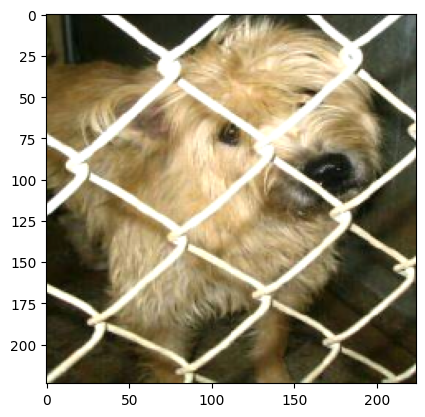

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(im.permute(1, 2,0).cpu())
print(label)